# What enrollment periods should be used?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime, timedelta

In [3]:
import os
os.getcwd()

'/sc/arion/projects/MetaDope/Randy/ehr'

In [4]:
os.chdir('ukbiobank/code/')

In [5]:
# Export specific files for all diagnoses of interest
ncd_icd = pd.read_parquet('../tidy_data/ncd_diagnoses.parquet')
sud_icd = pd.read_parquet('../tidy_data/sud_diagnoses.parquet')
oud_icd = pd.read_parquet('../tidy_data/oud_diagnoses.parquet')
aud_icd = pd.read_parquet('../tidy_data/aud_diagnoses.parquet')
tobacco_icd = pd.read_parquet('../tidy_data/tobacco_diagnoses.parquet')
hiv_icd = pd.read_parquet('../tidy_data/hiv_diagnoses.parquet')
sickle_icd = pd.read_parquet('../tidy_data/sickle_diagnoses.parquet')
hepc_icd = pd.read_parquet('../tidy_data/hepc_diagnoses.parquet')


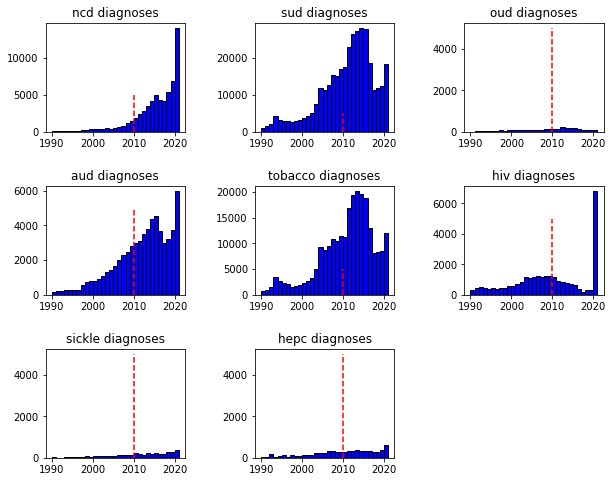

In [6]:
# Create a figure with a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

# Plot data on each subplot
for i,df,name in zip(range(8), [ncd_icd, sud_icd, oud_icd, aud_icd, tobacco_icd, hiv_icd, sickle_icd, hepc_icd],
                      ['ncd', 'sud', 'oud', 'aud', 'tobacco', 'hiv', 'sickle', 'hepc']):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(df.event_dt.dt.year, bins=range(1990, 2022), color='blue', edgecolor='black')
    ax.vlines(2010, 0, 5000, color='red', linestyle='--')
    ax.set_title(f'{name} diagnoses'.format(i+1))

# Remove the unused subplot
fig.delaxes(axes[-1,-1])

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

In [7]:
opioid_med = pd.read_parquet('../tidy_data/opioid_med.parquet')
ncd_med = pd.read_parquet('../tidy_data/ncd_med.parquet')
ms_ncd_med = pd.read_parquet('../../MSDW1794_V3/tidy_data/ncd_med.parquet')

In [8]:
ms_ncd_med.shape[0]/ncd_med.shape[0]

6.918346373160058

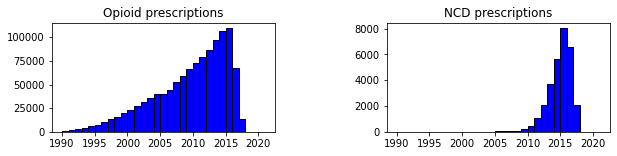

In [9]:
# Create a figure with a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))

# Plot data on each subplot
for i,df,t in zip(range(2), [opioid_med, ncd_med], ['Opioid', 'NCD']):
    # row = i // 3
    # col = i % 3
    ax = axes[i]
    ax.hist(df.issue_date.dt.year, bins=range(1990, 2022), color='blue', edgecolor='black')
    ax.set_title(f'{t} prescriptions')

# Remove the unused subplot
# fig.delaxes(axes[-1,-1])

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

In [12]:
pt_cnt = Counter(opioid_med.eid)

(array([46790.,  8224.,  3472.,  2048.,  1454.,  1086.,   861.,   717.,
          625.,   552.,   465.,   449.,   350.,   322.,   290.,   282.,
          253.,   225.,   266.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <BarContainer object of 19 artists>)

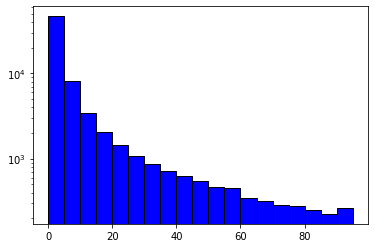

In [15]:
plt.hist([pt_cnt[i] for i in pt_cnt], bins=range(0, 100, 5), color='blue', edgecolor='black', log=True)